In [4]:
import numpy as np
from matplotlib import pyplot as plt

# Below is a function that takes in a data file(x,b1,b1 pol--q, b1 pol--e) and $Q^2$ value and plots a comparison of the estimated b1s and "true" b1. It also averages the data points in groups of 7 and plots the ratio of $\frac{b1_{est}}{b1_{true}}$, which must be changed because of an issue with the zero crossings.

In [7]:

def b1_comp_reldiff(file_path, Q2):
    with open(file_path, 'r') as file:
        data = file.readlines()
    
    # Extract variables from data
    x = []
    b1 = []
    b1polq_est = []
    b1pole_est = []
    for line in data:
        cols = line.split()
        x.append(float(cols[0]))
        b1.append(float(cols[1]))
        b1polq_est.append(float(cols[2]))
        b1pole_est.append(float(cols[3]))
        
    
    # Plot variables against x
    plt.figure()
    plt.plot(x, b1, label='b1', color = 'b')
    plt.plot(x, b1polq_est, label='b1 estimate polq')
    plt.title(r'$b_1$ comparison $Q^2$ = ' + Q2)
    plt.plot(x, b1, color = 'b' )
    plt.plot(x, b1pole_est, label='b1 estimate pole')
    plt.xlabel('2x')
    plt.ylabel('b1 /b1 estimate')
    plt.legend()
    print(len(x))
    
    
    # Average the 4 nearest data points ( to avoid zero crossings) and plot the ratio of b1_est/b1
    
    xave_tot = []
    b1polq_est_tot = []
    b1pole_est_tot = []
    b1_ave_tot = []
    for i in range(3,len(b1)-3):
        b1_ave_i = (b1[i] +b1[i-3] + b1[i-2] + b1[i-1] + b1[i+1] + b1[i+2] + b1[i+3])/7
        b1polq_est_i =  (b1polq_est[i] + b1polq_est[i-3] + b1polq_est[i-2] + b1polq_est[i-1] + b1polq_est[i+1] + b1polq_est[i+2] + b1polq_est[i+3])/7
        b1pole_est_i = (b1pole_est[i] + b1pole_est[i-3]+ b1pole_est[i-2] + b1pole_est[i-1] + b1pole_est[i+1] + b1pole_est[i+2]+ b1pole_est[i+3])/7
        xave_i = (x[i] + x[i-3] + x[i-2] + x[i-1] + x[i+1] + x[i+2] + x[1+3])/7
        b1_ave_tot.append(b1_ave_i)
        b1polq_est_tot.append(b1polq_est_i)
        b1pole_est_tot.append(b1pole_est_i)
        xave_tot.append(xave_i)
       
    
    plt.figure()
    b1_ratio_polq = (np.array(b1polq_est_tot)/np.array(b1_ave_tot))
    b1_ratio_pole = (np.array(b1pole_est_tot)/np.array(b1_ave_tot))
    plt.plot(xave_tot, b1_ratio_pole, label = r'$\frac{b1_{pol-e}}{b1}$')
    plt.plot(xave_tot, b1_ratio_polq, label = r'$\frac{b1_{pol-q}}{b1}$')
    plt.xlabel('2x')
    plt.title(r'$b_1$ relative difference $Q^2 = $' + Q2)
    plt.legend()


199


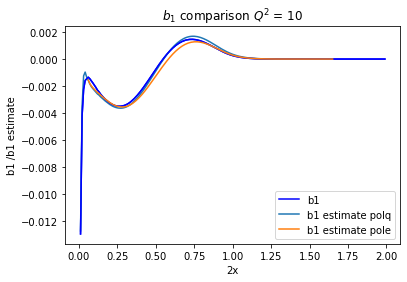

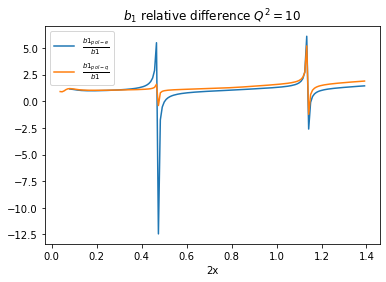

In [8]:
file_path1 = '/Users/brandonsamuelr/Downloads/b1_data_Q50.txt'
file_path2 = '/Users/brandonsamuelr/Downloads/b1_data_mstw_Q2.txt'
file_path3 = '/Users/brandonsamuelr/Downloads/b1_data_mstw_Q10.txt'
file_path4 = '/Users/brandonsamuelr/Downloads/b1_data_mstw_Q50.txt'
file_path5 = '/Users/brandonsamuelr/Downloads/b1_data_slac_Q2.txt'
file_path6 = '/Users/brandonsamuelr/Downloads/b1_data_slac_Q10.txt'
b1_comp_reldiff(file_path3, '10')

# Below are functions that takes a data file and compares the terms in the numerator of $A_{zz}$. 

# The first function/plot compares the structure functions themselves. The second compares the isolated coefficients in terms of $\epsilon$ and the polarization terms. 


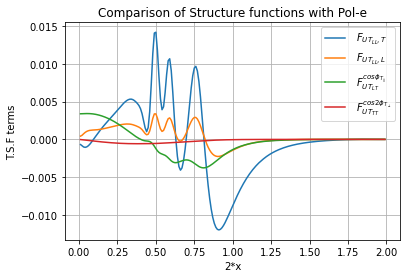

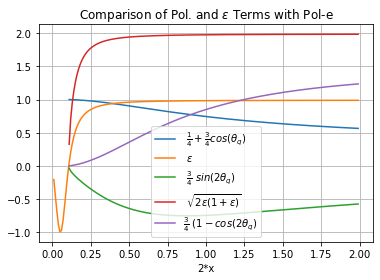

In [14]:
def compare_pol_eps_terms(file_path):
    # Initialize empty lists for x and y values
    x = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []

    # Read data from the text file
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip().split(' ')
            x.append(float(line[0]))
            y1.append(float(line[1]))
            y2.append(float(line[2]))
            y3.append(float(line[3]))
            y4.append(float(line[4]))
            y5.append(float(line[5]))
      
        
    # Create the plot
    
    plt.plot(x, y1, label= r' $\frac{1}{4} + \frac{3}{4} cos(\theta_{q})$ ')
    plt.plot(x, y2, label=r' $\epsilon$')
    plt.plot(x, y3, label= r' $\frac{3}{4}$ $sin(2\theta_{q})$')
    plt.plot(x, y4, label= r' $\sqrt{2 \epsilon (1 + \epsilon)}$')
    plt.plot(x, y5, label = r'$\frac{3}{4}$ $(1-cos(2\theta_{q})$')
    plt.xlabel('2*x')
    plt.ylabel('')
    plt.title(r'Comparison of Pol. and $ \epsilon $ Terms with Pol-e')
    plt.legend()
    plt.grid(True)
  
def compare_struc_func(file_path):
    # Initialize empty lists for x and y values
    x = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []


    # Read data from the text file
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip().split(' ')
            x.append(float(line[0]))
            y1.append(float(line[1]))
            y2.append(float(line[2]))
            y3.append(float(line[3]))
            y4.append(float(line[4]))

            
            
    plt.figure()
    plt.plot(x, y1, label= r' $F_{UT_{LL},T}$')
    plt.plot(x, y2, label=r' $F_{UT_{LL},L}$')
    plt.plot(x, y3, label= r' $F^{cos\phi_{T_\parallel}}_{UT_{LT}}$')
    plt.plot(x, y4, label= r' $F^{cos2\phi_{T_\perp}}_{UT_{TT}}$')
    
    plt.xlabel('2*x')
    plt.ylabel('T.S.F terms')
    plt.title('Comparison of Structure functions with Pol-e')
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()
    



# Provide the path to your text file
file_path1 = '/Users/brandonsamuelr/Downloads/struc_func_comparison.txt'
file_path2 = '/Users/brandonsamuelr/Downloads/pol_terms_comparison.txt'
file_path3 = '/Users/brandonsamuelr/Downloads/pol_terms_comparison_highQ2.txt'
file_path4 = '/Users/brandonsamuelr/Downloads/struc_func_comparison_highQ2.txt'



# Call the function to compare the data

compare_struc_func(file_path1)
compare_pol_eps_terms(file_path2)


# The function below compares the entire term as it appears in the $A_{zz}$ numerator, both the coefficient and structure function

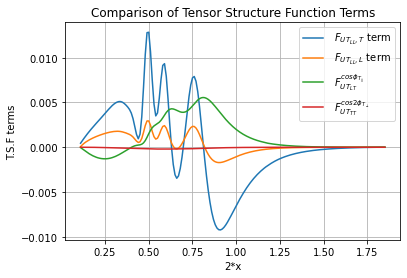

In [11]:
def compare_total_terms(file_path):
    # Initialize empty lists for x and y values
    x = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []

    # Read data from the text file
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip().split(' ')
            x.append(float(line[0]))
            y1.append(float(line[1]))
            y2.append(float(line[2]))
            y3.append(float(line[3]))
            y4.append(float(line[4]))
            y5.append(float(line[5]))

    # Create the plot
    plt.plot(x, y1, label= r' $F_{UT_{LL},T}$ term')
    plt.plot(x, y2, label=r' $F_{UT_{LL},L}$ term')
    plt.plot(x, y3, label= r' $F^{cos\phi_{T_\parallel}}_{UT_{LT}}$')
    plt.plot(x, y4, label= r' $F^{cos2\phi_{T_\perp}}_{UT_{TT}}$')

    plt.xlabel('2*x')
    plt.ylabel('T.S.F terms')
    plt.title('Comparison of Tensor Structure Function Terms')
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()

# Provide the path to your text file
file_path = '/Users/brandonsamuelr/Downloads/Azz_term_comparison_pole.txt'

# Call the function to compare the data
compare_total_terms(file_path)